In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

%matplotlib inline

# Domain Knowledge

The author of this dataset, Dean De Cock, gives a great description in his article ["Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project"](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf)

The data description can be found [here](https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/data_description.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1531258701&Signature=bxhF4mrypIfittl9AhGqNHYJ0%2B5Me8TPgRlBr0r8BtD3Z0rmScARsVg%2FKJLFR4KMc0hF1DLBRFfkSqf04QVDbiipI5JcfhFV9Gzdzd2GG4y%2FBSOnNFE48EK2Zkq%2Bhg8xXcMwHndEVGBVzY%2FesI072ckGOIRCQAB%2Fcbn8cou6bvrmMVuNfw13nYVEqCOe4KvU%2Fl6xc5IqqCQLov45VEKcgiesfIByPftpy5LsbCMgs55o8MAVQcBSXo7kSTpA3EGm1VvCX52BWULzeoPGQyZ%2BGoNYV72HHmzem2l75PTIspVxsSw2zQsNscfCekwQoXEYNtN2uyWs35FDM2NLX%2BCneQ%3D%3D)

In [2]:
df = pd.read_csv('train.csv')
df.set_index('Id')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


# Dataset Size

In [3]:
print("The Ames Housing Dataset")
print("Number of records: {:10g}".format(df.shape[0]))
print("Number of Features: {:9g}".format(df.shape[1]))

The Ames Housing Dataset
Number of records:       1460
Number of Features:        81


In [4]:
df.shape

(1460, 81)

# Explore Independent Variable

In [5]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

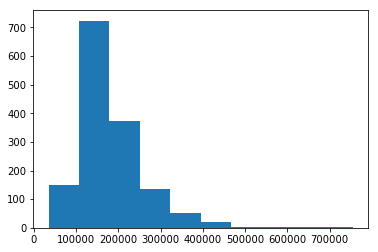

In [6]:
plt.hist(df.SalePrice)

The above indicates a slight right skew to the independent variables. We'll confirm this with a qqplot.

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519417, 180921.19589041095, 0.9319665641512989))

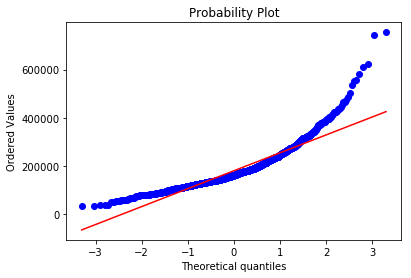

In [7]:
stats.probplot(df.SalePrice,plot=plt)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

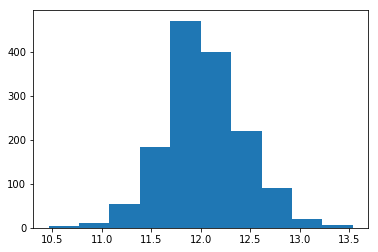

In [8]:
plt.hist(np.log(df.SalePrice))

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161887, 12.024050901109383, 0.9953761475636614))

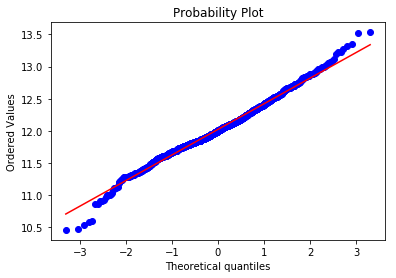

In [9]:
stats.probplot(np.log(df.SalePrice),plot=plt)

We see from the above that as indicated in the kaggle description, sales price is positive skew so we will use the logrithm of sales price as the target variable

We will also remove any entries with sales Price >$4000 as recommended by the author and pointed out by juliencs in here notebook [here](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)

In [10]:
df = df[df.SalePrice > 4000]

In [11]:
# Insert the Logarithm of Sale Price at the End of the dataframe
if 'LogSalePrice' not in list(df.columns):
    df.insert(loc=len(df.columns),
              column='LogSalePrice',
              value=np.log(df.SalePrice)
             )

# Data Cleaning

In [12]:
df.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LogSalePrice', 'LotArea',
       'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass',
       'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal',
       'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive',

In [13]:
df.isnull().sum().sort_values(ascending=False).head(18)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageCond        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
dtype: int64

In [14]:
#### Add dummy variable for pool and delete PoolQC and PoolArea
if 'Pool' not in list(df.columns):
    df.insert(loc=list(df.columns).index('PoolQC'),
              column='Pool',
              value=df.PoolArea.apply(lambda x: 1 if x>0 else 0)
         )
df.drop(['PoolArea', 'PoolQC'], axis=1, inplace=True)

# Dependent Variable EDA

#### GrLivArea: Above grade (ground) living area square feet

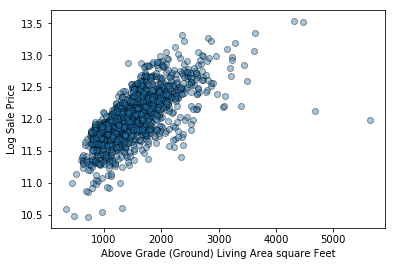

In [15]:
plt.scatter(x=df.GrLivArea, y=df.LogSalePrice, alpha=0.4, edgeColors='Black')
plt.xlabel('Above Grade (Ground) Living Area square Feet')
plt.ylabel('Log Sale Price')
plt.show()

#### TotalBsmtSF: Total square feet of basement area

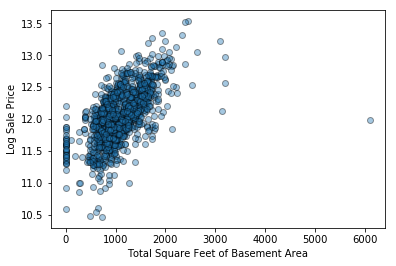

In [16]:
plt.scatter(x=df.TotalBsmtSF, y=df.LogSalePrice, alpha=0.4, edgeColors='Black')
plt.xlabel('Total Square Feet of Basement Area')
plt.ylabel('Log Sale Price')
plt.show()

#### OverallQual: Overall material and finish quality

/home/bf2931/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


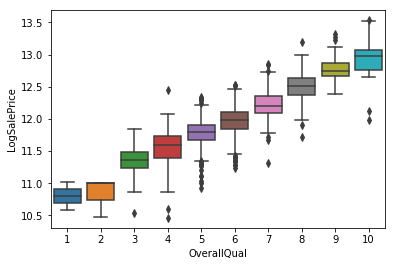

In [17]:
sns.boxplot(x=df.OverallQual, y=df.LogSalePrice)

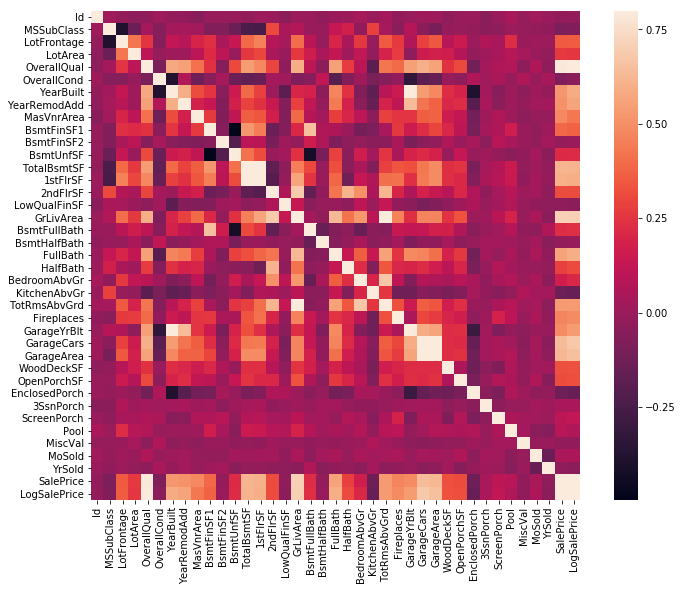

In [18]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

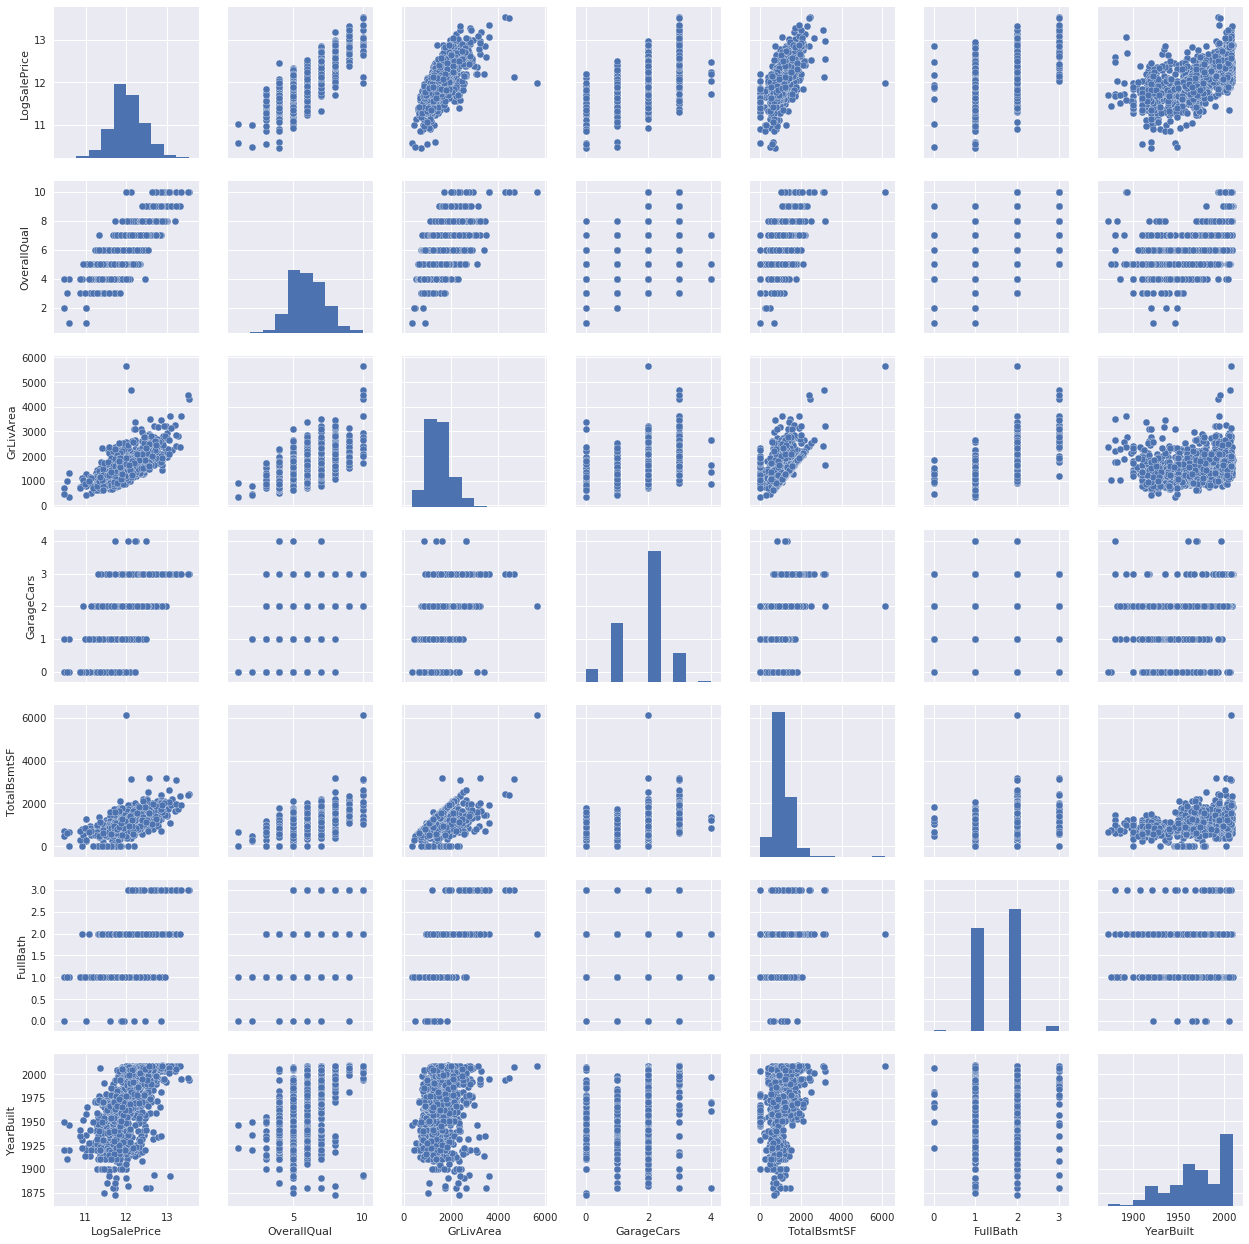

In [19]:
#scatterplot
sns.set()
cols = ['LogSalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

# Initial Model

In [20]:
# Set test size and the sizes of each set
test_size = 0.25
print("Training Set Size:{:10,g}".format(df.shape[0]*(1-test_size)))
print("Test Set Size: {:13,g}".format(df.shape[0]*test_size))

Training Set Size:     1,095
Test Set Size:           365


In [22]:
# Set X and y variables for regression
mod1Cols = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageCars']
X = df[mod1Cols]
y = df.LogSalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [26]:
X_train = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train)
lr = lr.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     599.6
Date:                Sat, 07 Jul 2018   Prob (F-statistic):          1.74e-273
Time:                        17:53:28   Log-Likelihood:                 83.652
No. Observations:                1095   AIC:                            -157.3
Df Residuals:                    1090   BIC:                            -132.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.9834      0.022    489.051      

# Forward Selection